✅ Libraries imported successfully!
📊 Dataset Shape: (3900, 18)
📝 Rows: 3,900 | Columns: 18
DATA STRUCTURE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   

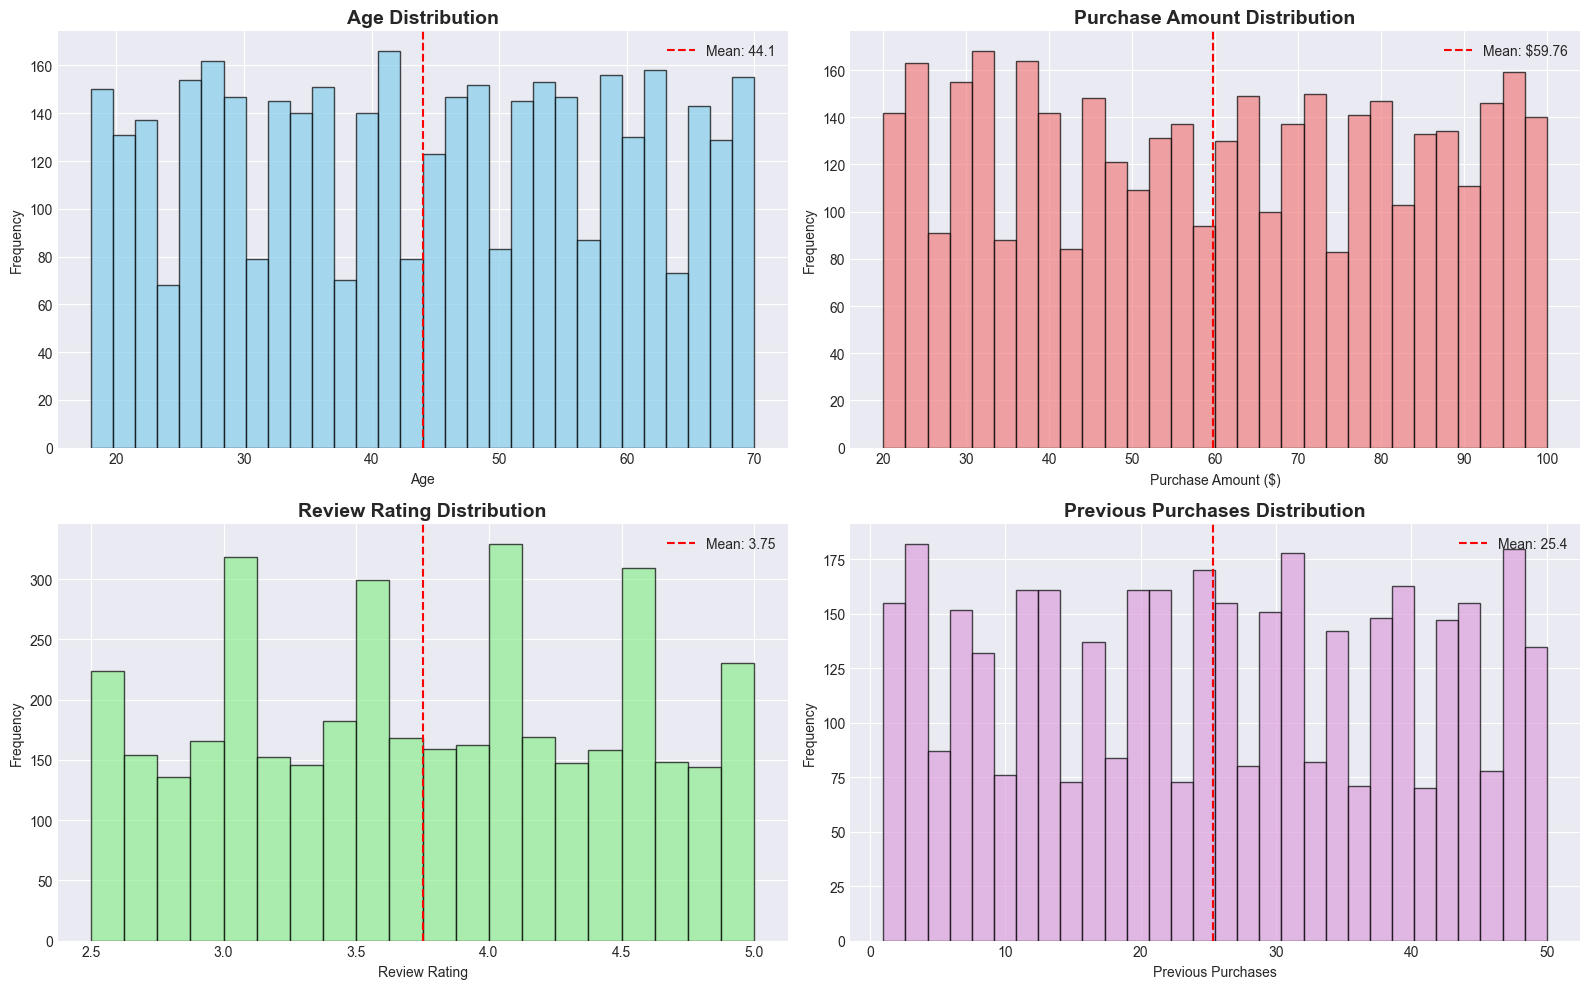

✅ Univariate analysis visualizations created


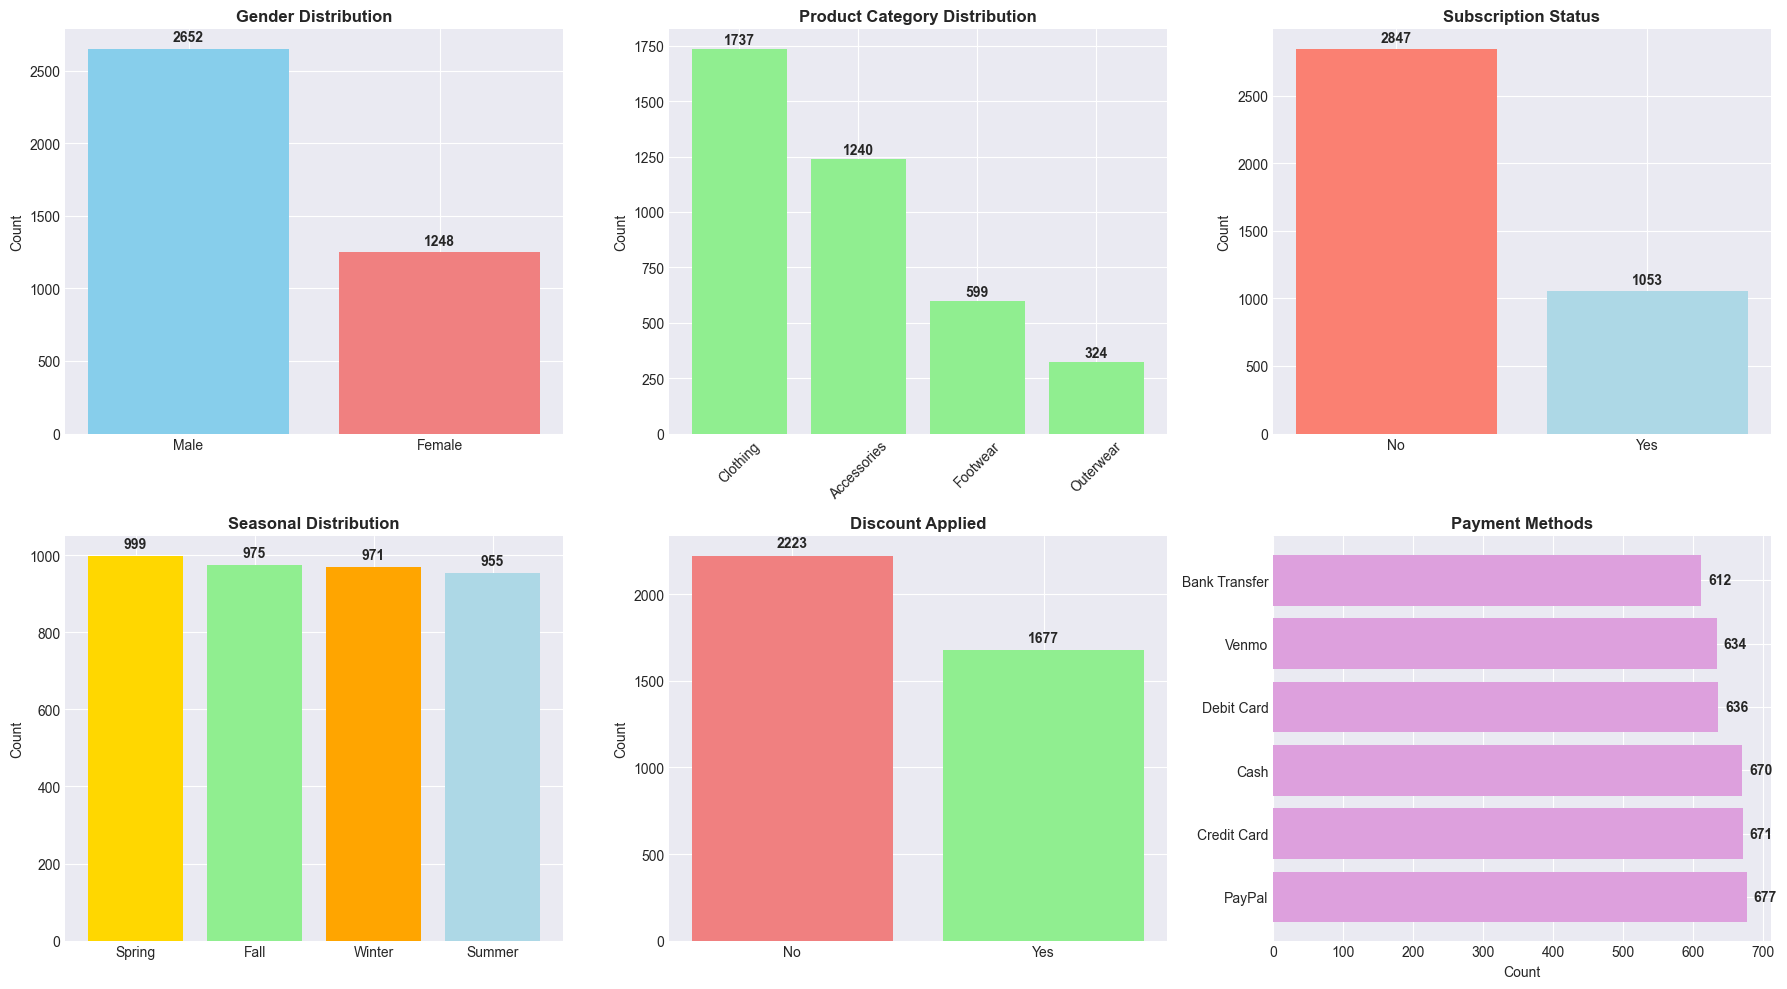

✅ Categorical analysis visualizations created


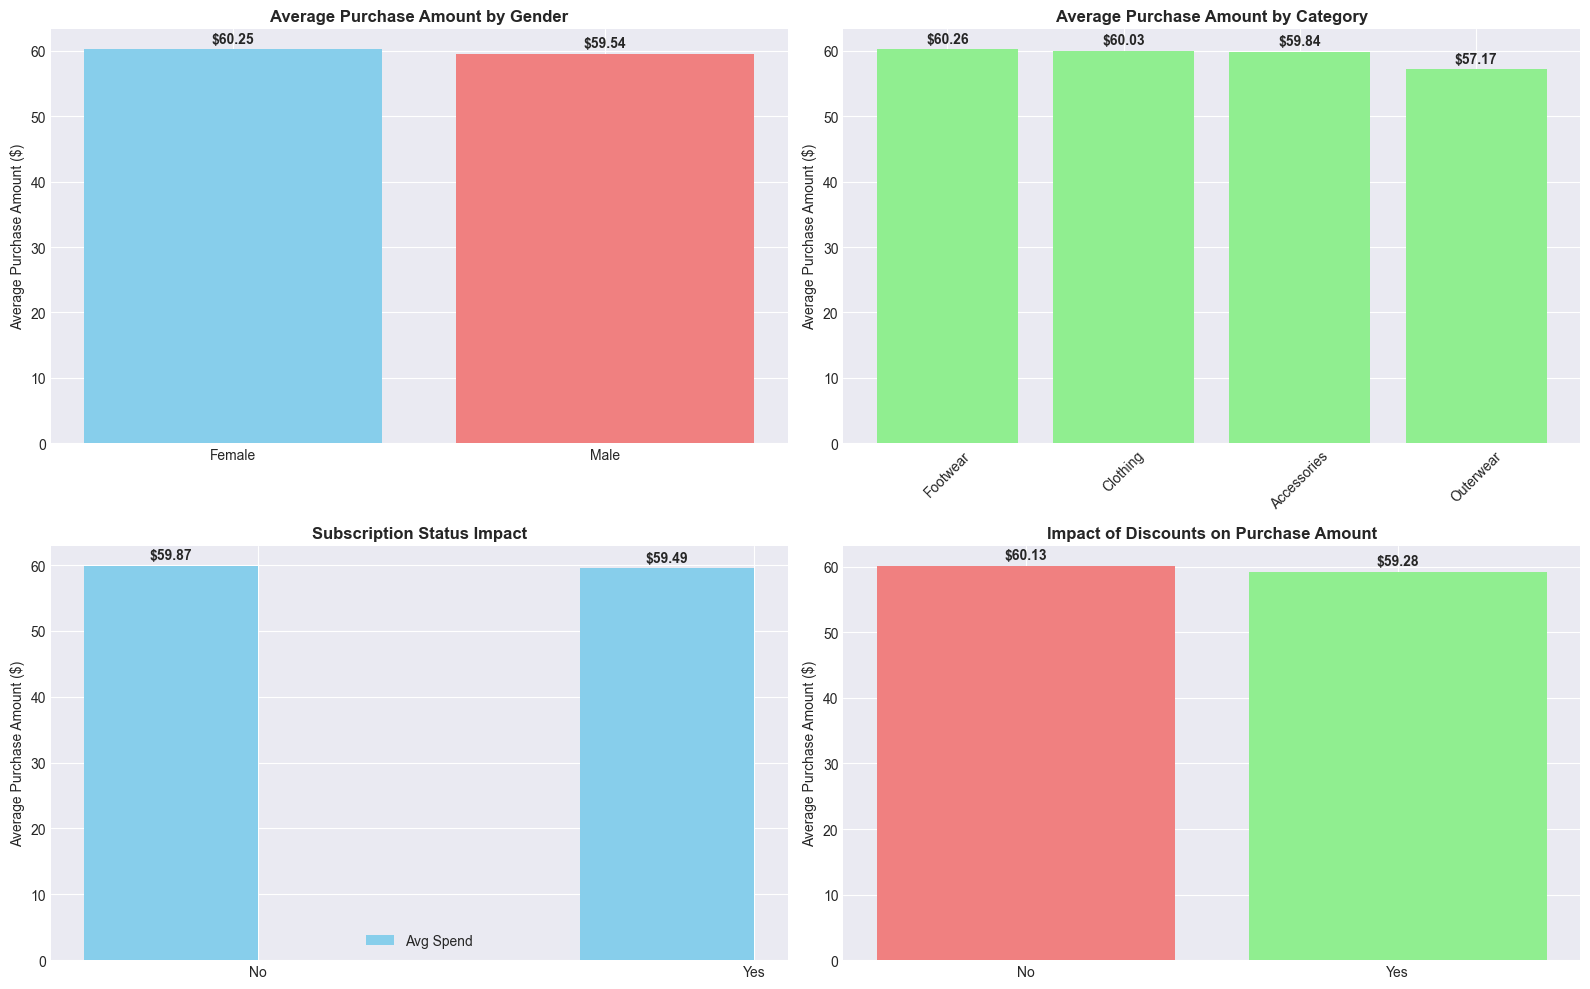

✅ Bivariate analysis visualizations created


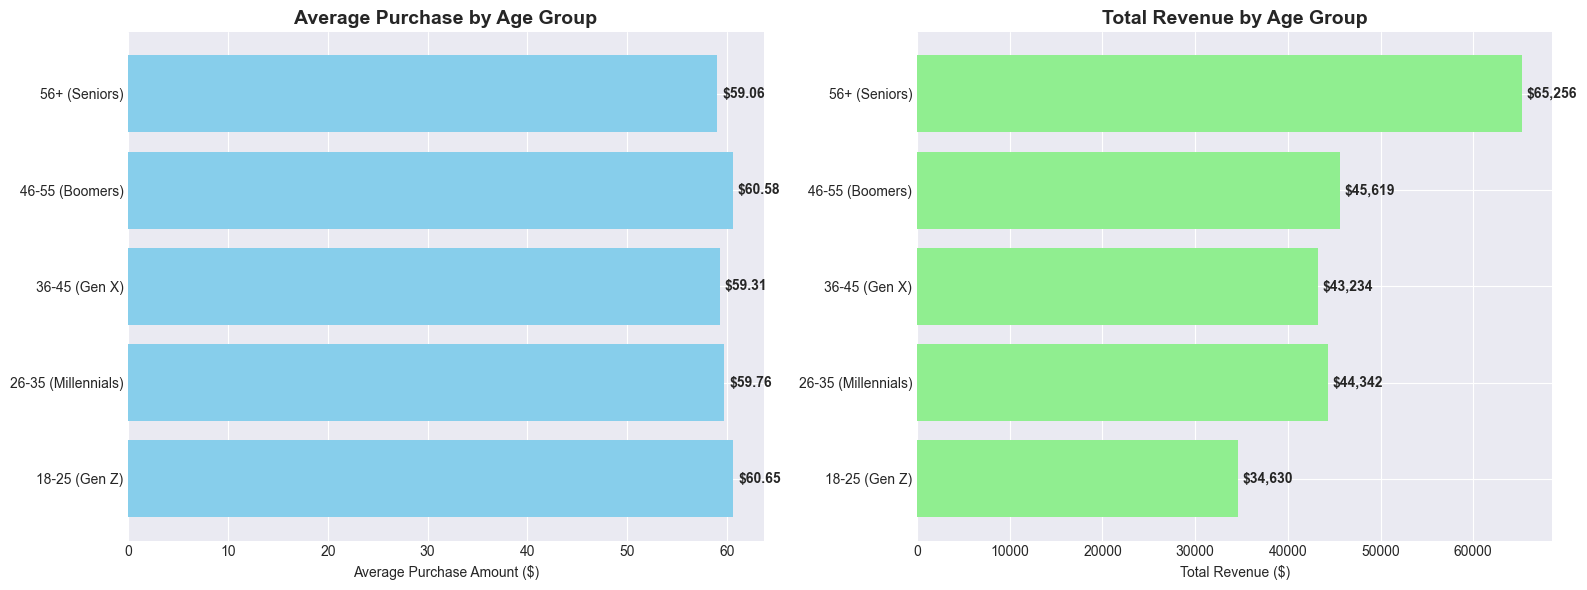

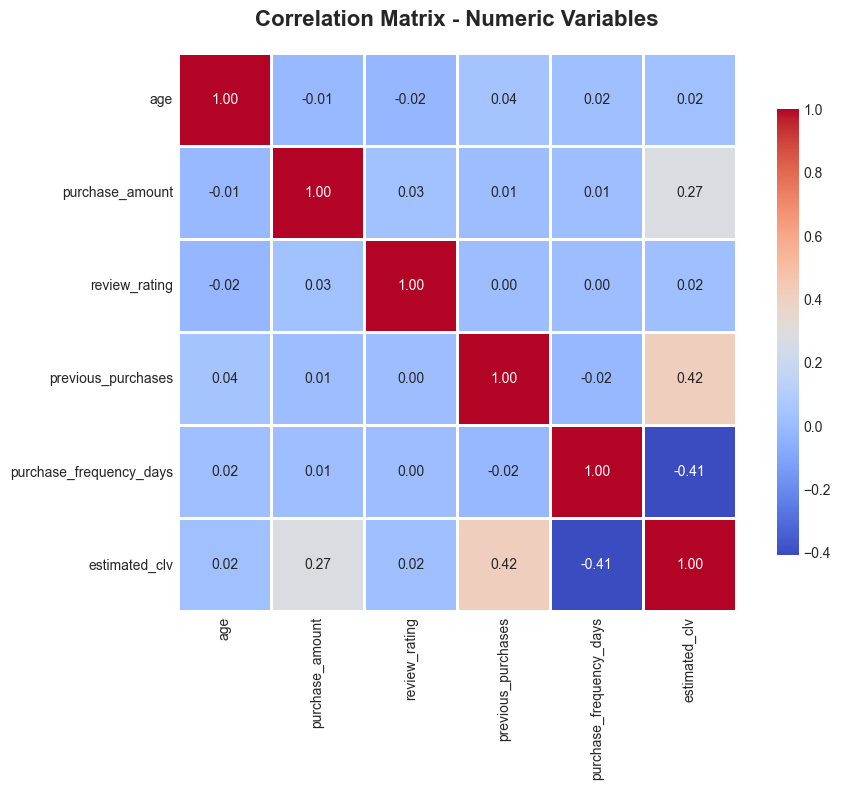

✅ Correlation analysis completed
CUSTOMER SEGMENT ANALYSIS
                  Count  Avg_Purchase  Total_Revenue  Avg_Rating  Avg_CLV
customer_segment                                                         
VIP Customer       1549         60.03        92984.0        3.77  4269.28
Loyal Customer     1172         59.48        69706.0        3.73  2405.20
Regular Customer    755         59.20        44699.0        3.72  1043.35
Occasional Buyer    341         61.11        20839.0        3.77   394.48
New Customer         83         58.47         4853.0        3.84   115.08


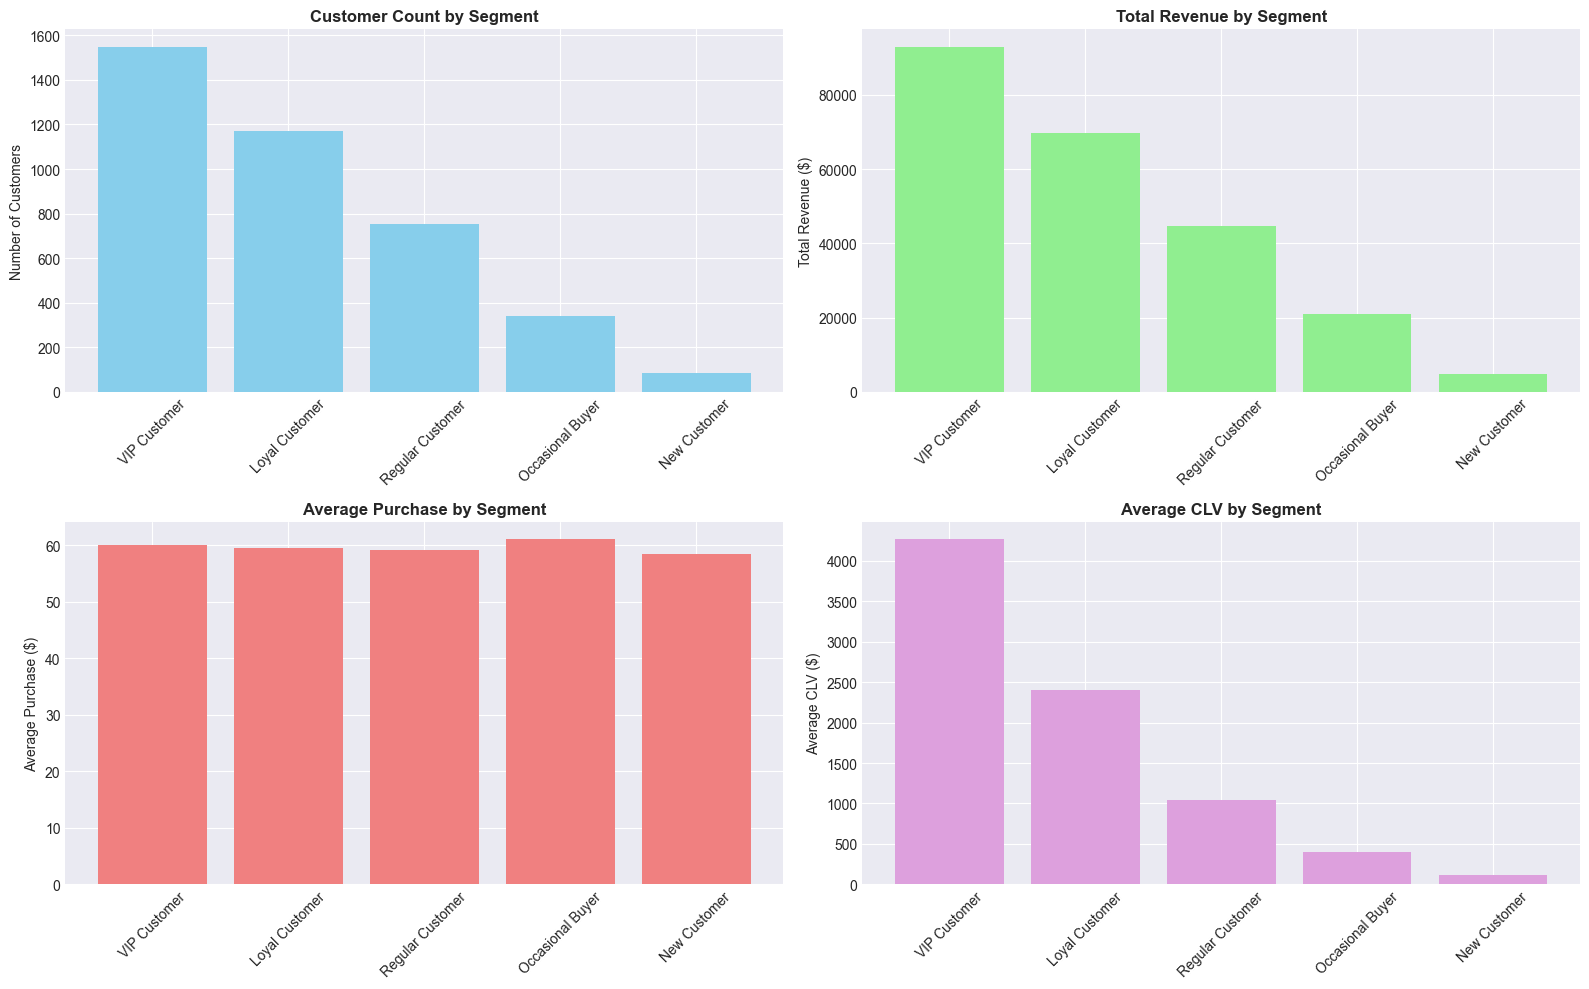

KEY INSIGHTS SUMMARY
📊 Total Revenue: $233,081.00
📊 Average Purchase: $59.76

👥 Total Unique Customers: 3,900
👥 Subscription Rate: 27.0%

🛍️ Most Popular Category: Clothing
🛍️ Most Purchased Item: Blouse

💰 Discount Usage Rate: 43.0%
💰 Average Previous Purchases: 25.4

🎯 Top Revenue Segment: VIP Customer
🎯 Revenue from Top Segment: $92,984.00
✅ Cleaned data saved to: ../data/processed/customer_cleaned.csv
📊 Final dataset shape: (3900, 23)
📝 Columns: ['customer_id', 'age', 'gender', 'item_purchased', 'category', 'purchase_amount', 'location', 'size', 'color', 'season', 'review_rating', 'subscription_status', 'shipping_type', 'discount_applied', 'previous_purchases', 'payment_method', 'frequency_of_purchases', 'age_group', 'purchase_frequency_days', 'customer_segment', 'spending_category', 'estimated_annual_purchases', 'estimated_clv']

DATA CLEANING & EDA COMPLETE!
Next Step: Advanced Analytics (Notebook 02)


In [2]:

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical Analysis
from scipy import stats

# Display Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

# %% [markdown]
# ## 2. LOAD DATA

# %%
# Load the dataset
df = pd.read_csv('../data/raw/customer_shopping_behavior.csv')

print(f"📊 Dataset Shape: {df.shape}")
print(f"📝 Rows: {df.shape[0]:,} | Columns: {df.shape[1]}")

# Display first few rows
df.head()

# %% [markdown]
# ## 3. INITIAL DATA INSPECTION

# %%
# Data types and missing values
print("=" * 80)
print("DATA STRUCTURE")
print("=" * 80)
df.info()

print("\n" + "=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_data)

# %%
# Statistical Summary
print("\n" + "=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)
df.describe(include='all').T

# %% [markdown]
# ## 4. DATA CLEANING

# %%
# 4.1: Handle Missing Values
print("🔧 STEP 1: Handling Missing Values...")

# Check which column has missing values
if df.isnull().sum().any():
    print(f"\n📌 Review Rating has {df['Review Rating'].isnull().sum()} missing values")
    
    # Strategy: Fill with median by category (more accurate than global median)
    df['Review Rating'] = df.groupby('Category')['Review Rating'].transform(
        lambda x: x.fillna(x.median())
    )
    
    print("✅ Missing values filled using category-wise median")
else:
    print("✅ No missing values found!")

# Verify
print(f"\n✅ Missing values after cleaning: {df.isnull().sum().sum()}")

# %%
# 4.2: Standardize Column Names
print("\n🔧 STEP 2: Standardizing Column Names...")

# Convert to snake_case
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('_(usd)', '', regex=False)

print("✅ Column names standardized to snake_case")
print("\nNew column names:")
print(df.columns.tolist())

# %%
# 4.3: Check for Duplicates
print("\n🔧 STEP 3: Checking for Duplicates...")

duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"✅ Removed {duplicates} duplicate rows")
else:
    print("✅ No duplicates found!")

# %%
# 4.4: Data Type Conversions
print("\n🔧 STEP 4: Converting Data Types...")

# Ensure numeric columns are correct type
df['customer_id'] = df['customer_id'].astype(int)
df['age'] = df['age'].astype(int)
df['purchase_amount'] = df['purchase_amount'].astype(float)
df['previous_purchases'] = df['previous_purchases'].astype(int)

print("✅ Data types converted successfully")

# %% [markdown]
# ## 5. FEATURE ENGINEERING

# %%
# 5.1: Create Age Groups
print("🔧 STEP 5: Feature Engineering...")

# Create age groups for segmentation
df['age_group'] = pd.cut(df['age'], 
                          bins=[0, 25, 35, 45, 55, 100],
                          labels=['18-25 (Gen Z)', '26-35 (Millennials)', 
                                 '36-45 (Gen X)', '46-55 (Boomers)', '56+ (Seniors)'])

print("✅ Age groups created")

# %%
# 5.2: Convert Purchase Frequency to Days
frequency_mapping = {
    'Weekly': 7,
    'Fortnightly': 14,
    'Bi-Weekly': 14,
    'Monthly': 30,
    'Every 3 Months': 90,
    'Quarterly': 90,
    'Annually': 365
}

df['purchase_frequency_days'] = df['frequency_of_purchases'].map(frequency_mapping)

print("✅ Purchase frequency converted to days")

# %%
# 5.3: Create Customer Segments based on Purchase History
def segment_customer(purchases):
    if purchases == 1:
        return 'New Customer'
    elif purchases <= 5:
        return 'Occasional Buyer'
    elif purchases <= 15:
        return 'Regular Customer'
    elif purchases <= 30:
        return 'Loyal Customer'
    else:
        return 'VIP Customer'

df['customer_segment'] = df['previous_purchases'].apply(segment_customer)

print("✅ Customer segments created")

# %%
# 5.4: Create Spending Categories
df['spending_category'] = pd.qcut(df['purchase_amount'], 
                                   q=4, 
                                   labels=['Low Spender', 'Medium Spender', 
                                          'High Spender', 'Premium Spender'])

print("✅ Spending categories created")

# %%
# 5.5: Calculate Customer Lifetime Value (CLV) Estimate
# CLV = Average Purchase * Purchase Frequency * Customer Lifespan
# Simplified: Based on historical purchases and frequency

df['estimated_annual_purchases'] = 365 / df['purchase_frequency_days']
df['estimated_clv'] = df['purchase_amount'] * df['estimated_annual_purchases'] * (df['previous_purchases'] / 10)

print("✅ Customer Lifetime Value estimated")

# %%
# 5.6: Check for Redundant Columns
print("\n🔧 Checking for redundant columns...")

# Check if discount_applied and promo_code_used are identical
if 'promo_code_used' in df.columns:
    are_identical = (df['discount_applied'] == df['promo_code_used']).all()
    print(f"discount_applied and promo_code_used identical: {are_identical}")
    
    if are_identical:
        df = df.drop('promo_code_used', axis=1)
        print("✅ Dropped redundant 'promo_code_used' column")

# %%
# Display cleaned dataframe
print("\n" + "=" * 80)
print("CLEANED DATASET - FINAL STRUCTURE")
print("=" * 80)
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:")
print(df.dtypes)

df.head()

# %% [markdown]
# ## 6. EXPLORATORY DATA ANALYSIS

# %% [markdown]
# ### 6.1: Univariate Analysis

# %%
# Age Distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Age Distribution
axes[0, 0].hist(df['age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['age'].mean(), color='red', linestyle='--', label=f'Mean: {df["age"].mean():.1f}')
axes[0, 0].legend()

# Purchase Amount Distribution
axes[0, 1].hist(df['purchase_amount'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Purchase Amount Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Purchase Amount ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['purchase_amount'].mean(), color='red', linestyle='--', 
                    label=f'Mean: ${df["purchase_amount"].mean():.2f}')
axes[0, 1].legend()

# Review Rating Distribution
axes[1, 0].hist(df['review_rating'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Review Rating Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Review Rating')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(df['review_rating'].mean(), color='red', linestyle='--', 
                    label=f'Mean: {df["review_rating"].mean():.2f}')
axes[1, 0].legend()

# Previous Purchases Distribution
axes[1, 1].hist(df['previous_purchases'], bins=30, color='plum', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Previous Purchases Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Previous Purchases')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(df['previous_purchases'].mean(), color='red', linestyle='--', 
                    label=f'Mean: {df["previous_purchases"].mean():.1f}')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('../reports/01_univariate_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Univariate analysis visualizations created")

# %%
# Categorical Variables Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Gender Distribution
gender_counts = df['gender'].value_counts()
axes[0, 0].bar(gender_counts.index, gender_counts.values, color=['skyblue', 'lightcoral'])
axes[0, 0].set_title('Gender Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Count')
for i, v in enumerate(gender_counts.values):
    axes[0, 0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Category Distribution
category_counts = df['category'].value_counts()
axes[0, 1].bar(category_counts.index, category_counts.values, color='lightgreen')
axes[0, 1].set_title('Product Category Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(category_counts.values):
    axes[0, 1].text(i, v + 20, str(v), ha='center', fontweight='bold')

# Subscription Status
sub_counts = df['subscription_status'].value_counts()
axes[0, 2].bar(sub_counts.index, sub_counts.values, color=['salmon', 'lightblue'])
axes[0, 2].set_title('Subscription Status', fontsize=12, fontweight='bold')
axes[0, 2].set_ylabel('Count')
for i, v in enumerate(sub_counts.values):
    axes[0, 2].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Season Distribution
season_counts = df['season'].value_counts()
axes[1, 0].bar(season_counts.index, season_counts.values, color=['gold', 'lightgreen', 'orange', 'lightblue'])
axes[1, 0].set_title('Seasonal Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Count')
for i, v in enumerate(season_counts.values):
    axes[1, 0].text(i, v + 20, str(v), ha='center', fontweight='bold')

# Discount Applied
discount_counts = df['discount_applied'].value_counts()
axes[1, 1].bar(discount_counts.index, discount_counts.values, color=['lightcoral', 'lightgreen'])
axes[1, 1].set_title('Discount Applied', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Count')
for i, v in enumerate(discount_counts.values):
    axes[1, 1].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Payment Method
payment_counts = df['payment_method'].value_counts().head(6)
axes[1, 2].barh(payment_counts.index, payment_counts.values, color='plum')
axes[1, 2].set_title('Payment Methods', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Count')
for i, v in enumerate(payment_counts.values):
    axes[1, 2].text(v + 10, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/02_categorical_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Categorical analysis visualizations created")

# %% [markdown]
# ### 6.2: Bivariate Analysis

# %%
# Key Relationships Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Purchase Amount by Gender
gender_purchase = df.groupby('gender')['purchase_amount'].mean().sort_values(ascending=False)
axes[0, 0].bar(gender_purchase.index, gender_purchase.values, color=['skyblue', 'lightcoral'])
axes[0, 0].set_title('Average Purchase Amount by Gender', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Average Purchase Amount ($)')
for i, v in enumerate(gender_purchase.values):
    axes[0, 0].text(i, v + 1, f'${v:.2f}', ha='center', fontweight='bold')

# 2. Purchase Amount by Category
category_purchase = df.groupby('category')['purchase_amount'].mean().sort_values(ascending=False)
axes[0, 1].bar(category_purchase.index, category_purchase.values, color='lightgreen')
axes[0, 1].set_title('Average Purchase Amount by Category', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Average Purchase Amount ($)')
axes[0, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(category_purchase.values):
    axes[0, 1].text(i, v + 1, f'${v:.2f}', ha='center', fontweight='bold')

# 3. Subscription Impact on Spending
sub_spending = df.groupby('subscription_status')['purchase_amount'].agg(['mean', 'count'])
x = np.arange(len(sub_spending.index))
width = 0.35
axes[1, 0].bar(x - width/2, sub_spending['mean'], width, label='Avg Spend', color='skyblue')
axes[1, 0].set_title('Subscription Status Impact', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Average Purchase Amount ($)')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(sub_spending.index)
axes[1, 0].legend()
for i, v in enumerate(sub_spending['mean']):
    axes[1, 0].text(i - width/2, v + 1, f'${v:.2f}', ha='center', fontweight='bold')

# 4. Discount Impact
discount_impact = df.groupby('discount_applied')['purchase_amount'].mean()
axes[1, 1].bar(discount_impact.index, discount_impact.values, color=['lightcoral', 'lightgreen'])
axes[1, 1].set_title('Impact of Discounts on Purchase Amount', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Average Purchase Amount ($)')
for i, v in enumerate(discount_impact.values):
    axes[1, 1].text(i, v + 1, f'${v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/03_bivariate_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Bivariate analysis visualizations created")

# %%
# Age Group Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Purchase Amount by Age Group
age_purchase = df.groupby('age_group')['purchase_amount'].agg(['mean', 'sum', 'count'])
axes[0].barh(age_purchase.index, age_purchase['mean'], color='skyblue')
axes[0].set_title('Average Purchase by Age Group', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Average Purchase Amount ($)')
for i, v in enumerate(age_purchase['mean']):
    axes[0].text(v + 0.5, i, f'${v:.2f}', va='center', fontweight='bold')

# Total Revenue by Age Group
axes[1].barh(age_purchase.index, age_purchase['sum'], color='lightgreen')
axes[1].set_title('Total Revenue by Age Group', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Total Revenue ($)')
for i, v in enumerate(age_purchase['sum']):
    axes[1].text(v + 500, i, f'${v:,.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/04_age_group_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Correlation Analysis for Numeric Variables
numeric_cols = ['age', 'purchase_amount', 'review_rating', 'previous_purchases', 
                'purchase_frequency_days', 'estimated_clv']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numeric Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../reports/05_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Correlation analysis completed")

# %% [markdown]
# ### 6.3: Customer Segmentation Analysis

# %%
# Customer Segment Performance
segment_analysis = df.groupby('customer_segment').agg({
    'customer_id': 'count',
    'purchase_amount': ['mean', 'sum'],
    'review_rating': 'mean',
    'estimated_clv': 'mean'
}).round(2)

segment_analysis.columns = ['Count', 'Avg_Purchase', 'Total_Revenue', 'Avg_Rating', 'Avg_CLV']
segment_analysis = segment_analysis.sort_values('Total_Revenue', ascending=False)

print("=" * 80)
print("CUSTOMER SEGMENT ANALYSIS")
print("=" * 80)
print(segment_analysis)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Count by Segment
axes[0, 0].bar(segment_analysis.index, segment_analysis['Count'], color='skyblue')
axes[0, 0].set_title('Customer Count by Segment', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Number of Customers')
axes[0, 0].tick_params(axis='x', rotation=45)

# Revenue by Segment
axes[0, 1].bar(segment_analysis.index, segment_analysis['Total_Revenue'], color='lightgreen')
axes[0, 1].set_title('Total Revenue by Segment', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Total Revenue ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Avg Purchase by Segment
axes[1, 0].bar(segment_analysis.index, segment_analysis['Avg_Purchase'], color='lightcoral')
axes[1, 0].set_title('Average Purchase by Segment', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Average Purchase ($)')
axes[1, 0].tick_params(axis='x', rotation=45)

# CLV by Segment
axes[1, 1].bar(segment_analysis.index, segment_analysis['Avg_CLV'], color='plum')
axes[1, 1].set_title('Average CLV by Segment', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Average CLV ($)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../reports/06_segment_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## 7. KEY INSIGHTS FROM EDA

# %%
print("=" * 80)
print("KEY INSIGHTS SUMMARY")
print("=" * 80)

insights = []

# 1. Revenue Insights
total_revenue = df['purchase_amount'].sum()
avg_purchase = df['purchase_amount'].mean()
insights.append(f"📊 Total Revenue: ${total_revenue:,.2f}")
insights.append(f"📊 Average Purchase: ${avg_purchase:.2f}")

# 2. Customer Insights
total_customers = df['customer_id'].nunique()
subscriber_pct = (df['subscription_status'] == 'Yes').sum() / len(df) * 100
insights.append(f"\n👥 Total Unique Customers: {total_customers:,}")
insights.append(f"👥 Subscription Rate: {subscriber_pct:.1f}%")

# 3. Product Insights
top_category = df['category'].value_counts().index[0]
top_item = df['item_purchased'].value_counts().index[0]
insights.append(f"\n🛍️ Most Popular Category: {top_category}")
insights.append(f"🛍️ Most Purchased Item: {top_item}")

# 4. Customer Behavior
discount_usage = (df['discount_applied'] == 'Yes').sum() / len(df) * 100
avg_previous_purchases = df['previous_purchases'].mean()
insights.append(f"\n💰 Discount Usage Rate: {discount_usage:.1f}%")
insights.append(f"💰 Average Previous Purchases: {avg_previous_purchases:.1f}")

# 5. Segment Insights
top_segment = segment_analysis['Total_Revenue'].index[0]
top_segment_revenue = segment_analysis.loc[top_segment, 'Total_Revenue']
insights.append(f"\n🎯 Top Revenue Segment: {top_segment}")
insights.append(f"🎯 Revenue from Top Segment: ${top_segment_revenue:,.2f}")

for insight in insights:
    print(insight)

print("=" * 80)

# %% [markdown]
# ## 8. SAVE CLEANED DATA

# %%
# Save cleaned dataset
output_path = '../data/processed/customer_cleaned.csv'
df.to_csv(output_path, index=False)

print(f"✅ Cleaned data saved to: {output_path}")
print(f"📊 Final dataset shape: {df.shape}")
print(f"📝 Columns: {list(df.columns)}")

print("\n" + "=" * 80)
print("DATA CLEANING & EDA COMPLETE!")
print("=" * 80)
print("Next Step: Advanced Analytics (Notebook 02)")
print("=" * 80)

In [4]:


df.columns


Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purchase_frequency_days',
       'customer_segment', 'spending_category', 'estimated_annual_purchases',
       'estimated_clv'],
      dtype='object')

In [5]:
df['customer_id'].nunique()


3900

In [6]:
print(f"Unique Customer IDs: {df['customer_id'].nunique()}")
print(f"Total Transactions: {len(df)}")
print(f"Avg transactions per customer: {len(df) / df['customer_id'].nunique():.2f}")


Unique Customer IDs: 3900
Total Transactions: 3900
Avg transactions per customer: 1.00


In [8]:
df.groupby('discount_applied')['purchase_amount'].describe()


,count,mean,std,min,25%,50%,75%,max
discount_applied,,,,,,,,
No,2223.0,60.130454,23.740327,20.0,39.0,60.0,81.0,100.0
Yes,1677.0,59.279070,23.610697,20.0,38.0,60.0,80.0,100.0
